In [ ]:
from myhdl import *
def Fetch(clk, Inst, pc,stall,counter):
  InstMemo=['00000001100010100110100000100000',
'00000001101011010111100000100010',
'00100011001101010000000100010001',
'00010010010100100000000000000010',
'00100011001101010000001100010001',
'00100011001101010000001100010001',
'00100011001101010000001100010001',
'00100011001101010000001100010001',
'00100011001101010000001100010001',
'00100011001101010000001100010001',
'00100011001101010000001100010001',
'00000010010101010110100000111000',
'00000001000111010000100000111000',
'10101110110101110000000000111010',
'10101110001010100001111100101000',
'10001110101110011110101100010001',
'00100001100010111111111111110001',
'10010010000100001010100000100000',
'10101111001110010001111110000101',
'00100010110100010010100101110011',
'10101101010011110010100010011101',
'10101110101101000100110011111010',
'00000001110011111011100000100000',
'00000010001110010100100000110111',
'00100001101011111011011011110100',
'00000010101101001011100000110110',
'00000001010101010100100000110111',
'00000001011100010101100000100000',
'00100011000100110100010111001001',
'10101110110101110000101001111010',
'10001101011110000000101001111010',
'00000011001100011011000000100010',
'00000001101101101011000000100010',
'00100001101011011111111111111011',
'00000010100100100110000000110111',
'00000010011011000101000000100000',
'00000001010011111000000000111000',
'00000010110110011000100000100010',
'00010010010100100000000000000000']
  @always(clk.posedge)
  def FetchBehave():
    counter.next=counter+1
    if stall:
      Inst.next=intbv(0)
    else:
      pc.next= pc+1
      if pc>=intbv(32):
        pc.next=intbv(0)
      Inst.next= intbv(InstMemo[pc])
  return FetchBehave

In [ ]:
def decode(Inst,opcode,rs,rt,rd,sa,function,immediate):
    @always(Inst)
    def logicd():
        opcode.next =Inst[32:26]
        rs.next=Inst[26:21]
        rt.next=Inst[21:16]
        rd.next=Inst[16:11]
        sa.next=Inst[11:6]
        function.next=Inst[6:0]
        immediate.next=Inst[16:0]

    return logicd

In [ ]:
def control_unit(opcode,function,regDst,regWrite,ALUSrc,ALUOp,memWrite,memRead,memToReg,branch,previousmemWrite,LW,counter):
    @always(opcode,function)
    def logiccu():
        if opcode==0b000000:
            LW.next=0
            regDst.next=0b1
            regWrite.next=0b1
            ALUSrc.next=0b0
            previousmemWrite.next=memWrite
            memWrite.next=0b0
            memRead.next=0b0
            memToReg.next=0b0
            branch.next=0b0
            if function==0b100000:
                ALUOp.next=0b010
            elif function==0b100010:
                ALUOp.next=0b110
            elif function==0b110110:
                ALUOp.next=0b000
            elif function==0b110111:
                ALUOp.next=0b001
            elif function==0b111000:
                ALUOp.next=0b011
        elif opcode==0b100011:
            LW.next=1
            regDst.next=0b0
            regWrite.next=0b1
            ALUSrc.next=0b1
            ALUOp.next=0b010
            previousmemWrite.next=memWrite
            memWrite.next=0b0
            memRead.next=0b1
            memToReg.next=0b1
            branch.next=0b0
        elif opcode==0b001000:
            LW.next=0
            regDst.next=0b0
            regWrite.next=0b1
            ALUSrc.next=0b1
            ALUOp.next=0b010
            previousmemWrite.next=memWrite
            memWrite.next=0b0
            memRead.next=0b0
            memToReg.next=0b0
            branch.next=0b0
        elif opcode==0b100100:
            LW.next=0
            regDst.next=0b0
            regWrite.next=0b1
            ALUSrc.next=0b1
            ALUOp.next=0b110
            previousmemWrite.next=memWrite
            memWrite.next=0b0
            memRead.next=0b0
            memToReg.next=0b0
            branch.next=0b0
        elif opcode==0b101011:
            LW.next=0
            regWrite.next=0b0
            ALUSrc.next=0b1
            ALUOp.next=0b010
            previousmemWrite.next=memWrite
            memWrite.next=0b1
            memRead.next=0b0
            branch.next=0b0
        elif opcode==0b000100:
            LW.next=0
            regWrite.next=0b0
            ALUSrc.next=0b0
            ALUOp.next=0b110
            previousmemWrite.next=memWrite
            memWrite.next=0b0
            memRead.next=0b0
            branch.next=0b1

    return logiccu

In [ ]:
!pip install myhdl
!pip install myhdlpeek

In [ ]:
def mux(a,b,sel,z):
    @always(a,b,sel)
    def logicm():
        if sel:
            z.next=a
        else:
            z.next=b
    return logicm

In [ ]:
def register(clk,rs,rt,regWrite,writeR,writeD,readD1,readD2):
    R= [Signal(intbv(4)[32:]),Signal(intbv(5)[32:]),Signal(intbv(3)[32:]),Signal(intbv(6)[32:]),Signal(intbv(7)[32:]),Signal(intbv(5)[32:]),Signal(intbv(8)[32:]),Signal(intbv(7)[32:]),Signal(intbv(1)[32:]),Signal(intbv(23)[32:]),Signal(intbv(55)[32:]),Signal(intbv(4)[32:]),Signal(intbv(5)[32:]),Signal(intbv(65)[32:]),Signal(intbv(73)[32:]),Signal(intbv(45)[32:]),Signal(intbv(16)[32:]),Signal(intbv(7)[32:]),Signal(intbv(3)[32:]),Signal(intbv(22)[32:]),Signal(intbv(11)[32:]),Signal(intbv(55)[32:]),Signal(intbv(15)[32:]),Signal(intbv(76)[32:]),Signal(intbv(5)[32:]),Signal(intbv(3)[32:]),Signal(intbv(45)[32:]),Signal(intbv(12)[32:]),Signal(intbv(23)[32:]),Signal(intbv(12)[32:]),Signal(intbv(6)[32:]),Signal(intbv(0)[32:])]
    @always(writeD)
    def logicr_write():
        if regWrite==1:
            R[writeR].next=writeD
    @always(rs,rt)
    def logicr_read():
        readD1.next=R[rs]
        readD2.next=R[rt]
    return logicr_write,logicr_read

In [ ]:
def signExtend(immediate,signE):
    ones=0b1111111111111111
    @always_comb
    def logics():
        if immediate[15]==1:
            signE.next=concat(ones,immediate)
        else:
            signE.next=concat(intbv(0)[16:],immediate)
    return logics

In [ ]:
def ALU(readD1,aluinput,ALUOp,ALURes,zero):
    @always(readD1,aluinput,ALUOp)
    def logica():
        if ALUOp==0b010:
            ALURes.next=readD1+aluinput
        elif ALUOp==0b110:
            ALURes.next=abs(readD1 - aluinput)
        elif ALUOp==0b000:
            ALURes.next=readD1&aluinput
        elif ALUOp==0b001:
            ALURes.next=readD1|aluinput
        else:
            ALURes.next=readD1^aluinput
        if ALURes.next==intbv(0):
            zero.next=1
        else:
            zero.next=0

    return logica

In [ ]:
def DataMemory(clk,ALURes,readD2,ReadData,memWrite,memRead):
    R= [Signal(intbv(0)[32:]) for i in range(1000)]
    @always(clk.posedge)
    def logicdm_read():
        if memRead==1:
            ReadData.next=R[ALURes]
    @always(clk.negedge)
    def logicdm_write():
        if memWrite==1 and ALURes<len(R):
            R[ALURes].next=readD2

    return logicdm_read,logicdm_write

In [ ]:
def branchalu(signE,shifted_signal,pc,addALURes,prev_branch,branch):
    @always(shifted_signal,signE)
    def lojicb():
        shifted_signal.next = concat(signE[2:], intbv(0)[2:])
        addALURes.next=abs(pc + shifted_signal)
        if prev_branch.next == 1:
            pc.next = pc+1
        prev_branch.next = branch
    return lojicb

In [ ]:
def and_gate(branch,zero,And):
    @always(branch,zero)
    def lojica():
        And.next=zero&branch
    return lojica

In [ ]:
def stall_function(memRead,memWrite,previousmemWrite,stall,counter,LW):
  @always_comb
  def lojics():
    if memRead==1 and previousmemWrite==1:
      stall.next=1
    elif LW==1 and counter==4:
      stall.next=1
    else:
      stall.next=0
    if counter==5:
      counter.next=1

  return lojics


<class 'myhdl.StopSimulation'>: No more events


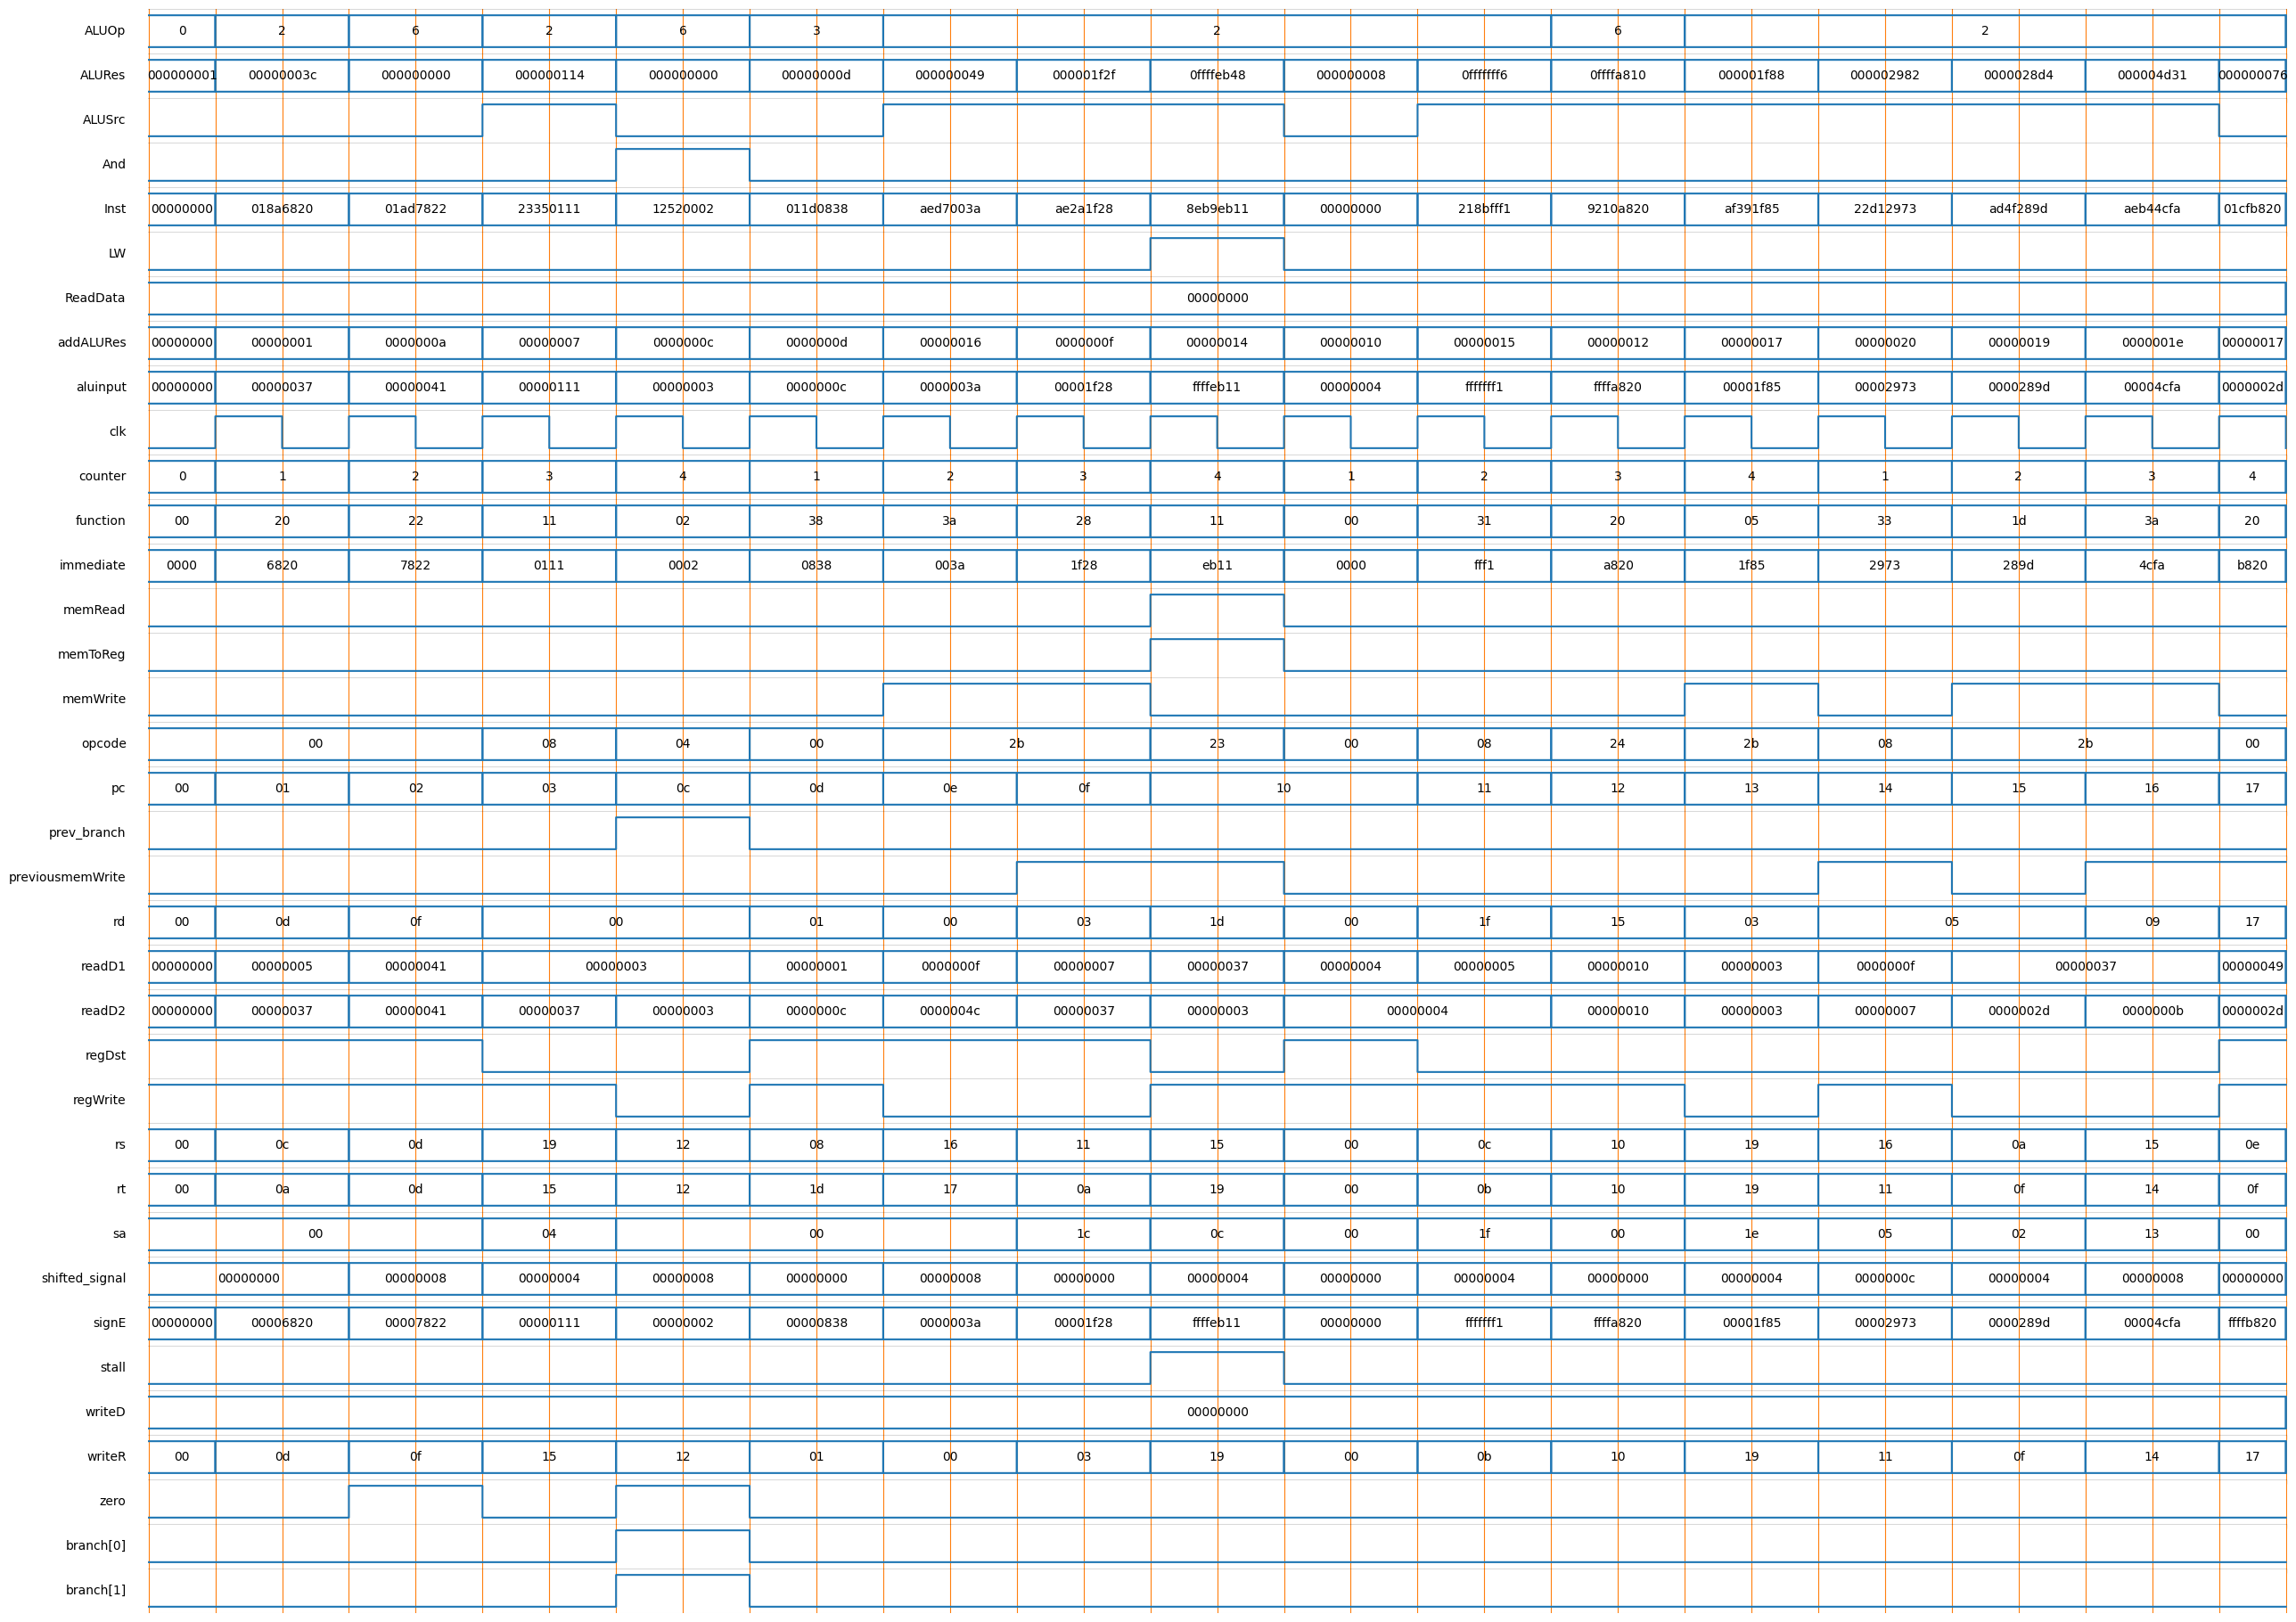

In [ ]:
from myhdl import *
from myhdlpeek import *

pc=Signal(intbv(0) [5:])

clk=Signal( bool(0))
Inst= Signal(intbv(0)[32:])

opcode=Signal(intbv(0)[6:])
rs=Signal(intbv(0)[5:])
rt=Signal(intbv(0)[5:])
rd=Signal(intbv(0)[5:])
sa=Signal(intbv(0)[5:])
function=Signal(intbv(0)[6:])
immediate=Signal(intbv(0)[16:])
#instr_index=Signal(intbv(0)[26:])

regDst = Signal(bool(1))
regWrite = Signal(bool(1))
ALUSrc = Signal(bool(0))
ALUOp = Signal(intbv(0)[3:])
memWrite = Signal(bool(0))
memRead = Signal(bool(0))
memToReg = Signal(bool(0))
branch = Signal(bool(0))
previousmemWrite = Signal(bool(0))
LW = Signal(bool(0))

#a=Signal(intbv(0)[32:])
#b=Signal(intbv(0)[32:])
#sel=Signal(bool(0))
#z=Signal(intbv(0)[32:])

writeR=Signal(intbv(0)[5:])
writeD=Signal(intbv(0)[32:])
readD1=Signal(intbv(0)[32:])
readD2=Signal(intbv(0)[32:])
wR_inst=mux(rd,rt,regDst,writeR)

signE=Signal(intbv(0)[32:])

zero=Signal(bool(0))
ALURes=Signal(intbv(1,min=(-2**32),max=(2**32)))
aluinput=Signal(intbv(0)[32:])
aluinput_inst=mux(signE,readD2,ALUSrc,aluinput)

ReadData=Signal(intbv(0)[32:])
wD_inst=mux(ReadData,ALURes,memToReg,writeD)

shifted_signal=Signal(intbv(0)[32:])
addALURes=Signal(intbv(0)[32:])
prev_branch=Signal(bool(0))

And=Signal(bool(0))
pcOut_inst=mux(addALURes,pc,And,pc)

stall=Signal(bool(0))
counter=Signal(intbv(0)[3:])

Peeker(clk, "clk")
Peeker(Inst, "Inst")
Peeker(pc, "pc")
fetchInst= Fetch(clk, Inst, pc, stall, counter)

Peeker(opcode, "opcode")
Peeker(rs, "rs")
Peeker(rt, "rt")
Peeker(rd, "rd")
Peeker(sa, "sa")
Peeker(function, "function")
Peeker(immediate, "immediate")
decode_inst=decode(Inst,opcode,rs,rt,rd,sa,function,immediate)

Peeker(regDst, "regDst")
Peeker(regWrite, "regWrite")
Peeker(ALUSrc, "ALUSrc")
Peeker(ALUOp, "ALUOp")
Peeker(memWrite, "memWrite")
Peeker(memRead, "memRead")
Peeker(memToReg, "memToReg")
Peeker(branch, "branch")
Peeker(previousmemWrite, "previousmemWrite")
Peeker(LW, "LW")
control_inst=control_unit(opcode,function,regDst,regWrite,ALUSrc,ALUOp,memWrite,memRead,memToReg,branch,previousmemWrite,LW,counter)

#Peeker(a, "a")
#Peeker(b, "b")
#Peeker(sel, "sel")
#Peeker(z, "z")
#mux_inst=mux(a,b,sel,z)

Peeker(writeR, "writeR")
Peeker(writeD, "writeD")
Peeker(readD1, "readD1")
Peeker(readD2, "readD2")
register_inst=register(clk,rs,rt,regWrite,writeR,writeD,readD1,readD2)

Peeker(signE, "signE")
signExtend_inst= signExtend(immediate,signE)

Peeker(zero, "zero")
Peeker(ALURes, "ALURes")
Peeker(aluinput, "aluinput")
ALU_inst=ALU(readD1,aluinput,ALUOp,ALURes,zero)

Peeker(ReadData, "ReadData")
DataMemory_inst=DataMemory(clk,ALURes,readD2,ReadData,memWrite,memRead)

Peeker(shifted_signal, "shifted_signal")
Peeker(addALURes, "addALURes")
Peeker(prev_branch, "prev_branch")
Peeker(branch, "branch")
branch_inst=branchalu(signE,shifted_signal,pc,addALURes,prev_branch,branch)

Peeker(And, "And")
and_gate_inst=and_gate(branch,zero,And)


Peeker(stall, "stall")
Peeker(counter, "counter")
stall_inst=stall_function(memRead,memWrite,previousmemWrite,stall,counter,LW)


def fetchTB():
  @instance
  def invertclk():
      for u in range(32):
        yield (delay(1))
        clk.next= not clk
  return instances()

sim = Simulation (fetchInst,decode_inst,control_inst,register_inst,wR_inst,signExtend_inst,aluinput_inst,ALU_inst,pcOut_inst,branch_inst,and_gate_inst,stall_inst,fetchTB(),*Peeker.instances())
sim.run()
Peeker.show_waveforms(width = 30, slope=0)
Peeker.clear()

In [ ]:
Peeker.clear()